In [ ]:
import pandas as pd
from datetime import datetime, timedelta
import os

: 

In [3]:
#arquivos_GNSS = r"C:\Users\rafam\Desktop\IC_GNSS\EstudoGNSS\dados\MGBH\MGBH.2016.trop\MGBH.2016.001.txt"
arquivos_GNSS = r"C:\Users\rafam\Desktop\IC_GNSS\EstudoGNSS\dados\MGBH"

In [4]:
def converter_epoch(epoch_string):
    ano = "20" + epoch_string[0:2]
    dia_ano = epoch_string[3:6]
    segundo = epoch_string[7:12]
    if segundo == "00000":
        hora = "00:00:00"
    else:
        total_segundos = int(segundo) 
        horas_int = total_segundos // 3600
        segundos_restantes = total_segundos % 3600
        minutos_int = segundos_restantes // 60
        segundos_int = segundos_restantes % 60
        hora_formatada = f"{horas_int:02d}:{minutos_int:02d}:{segundos_int:02d}"
        hora = hora_formatada
    
    dia_ano = pd.to_datetime(dia_ano,format="%j")
    return f"{ano}-{dia_ano.strftime("%m-%d")} {hora}"


In [ ]:
d = pd.to_datetime(1,format="%j")
d.strftime("%d-%m")

'01-01'

In [ ]:
lista_dados = []
flag_arquivo = 0
df_final = pd.DataFrame()
for pasta in os.listdir(arquivos_GNSS):
    pasta_GNSS = os.path.join(arquivos_GNSS, pasta)
    for arquivo in os.listdir(pasta_GNSS):
        arquivo_GNSS = os.path.join(pasta_GNSS, arquivo)
        with open(arquivo_GNSS, "r") as f:
            flag = -1
            flag_arquivo += 1
            for linha in f:
                if linha.strip() == "+TROP/SOLUTION":
                    flag = 1
                elif linha.strip() == "-TROP/SOLUTION":
                    flag = 0
                if flag == 1:
                    lista_dados.append(linha.strip())
                    
        lista_dados_corrigida = lista_dados[1:]
        dados_quebrados = [x.split() for x in lista_dados_corrigida]
        df = pd.DataFrame(
            dados_quebrados[1:],    
            columns=dados_quebrados[0]  
        )
        df_final = pd.concat([df_final, df], ignore_index=True)
        lista_dados = []



KeyboardInterrupt: 

In [ ]:
import pandas as pd
from pathlib import Path
import re

# Esta lista vai guardar as LINHAS DE DADOS (já separadas)
lista_para_df = [] 
# Estas variáveis vão guardar as colunas (que virão do header)
colunas = [] 
num_colunas = 0

pasta_principal = Path(r'C:\Users\rafam\Desktop\IC_GNSS\EstudoGNSS\dados\MGBH')
padrao = r'\+TROP/SOLUTION(.*?)\-TROP/SOLUTION' # Seu regex
print(f"Iniciando busca por '*.txt' em: {pasta_principal}\n")

for arquivo in pasta_principal.rglob('*.txt'):
    try:
        print(f"--- Lendo {arquivo.name} ---")
        conteudo = arquivo.read_text(encoding='utf-8')
        blocos_encontrados = re.findall(padrao, conteudo, re.DOTALL)
        
        if blocos_encontrados:
            print(f"    Encontrados {len(blocos_encontrados)} blocos.")
            
            # --- LÓGICA ALTERADA: PROCESSAR CADA BLOCO ---
            
            for bloco_bruto in blocos_encontrados:
                # 1. Limpa o bloco e divide em linhas.
                #    Remove linhas em branco que podem existir.
                linhas = [linha.strip() for linha in bloco_bruto.strip().split('\n') if linha.strip()]
                
                # 2. Pula blocos vazios ou que só têm cabeçalho
                if len(linhas) < 2:
                    print("    Aviso: Bloco encontrado, mas sem linhas de dados.")
                    continue # Pula para o próximo bloco

                # 3. Define as colunas (APENAS NA PRIMEIRA VEZ)
                #    'if not colunas' é True se a lista 'colunas' estiver vazia
                if not colunas: 
                    linha_header = linhas[0]
                    colunas = linha_header.split() # Separa o header pelos espaços
                    num_colunas = len(colunas)
                    print(f"    Colunas definidas: {colunas}")

                # 4. Pega todas as linhas DE DADOS (da segunda em diante)
                linhas_dados = linhas[1:]
                
                for linha in linhas_dados:
                    valores = linha.split() # Separa a linha de dados pelos espaços
                    
                    # 5. Validação: Só adiciona se o número de colunas bater
                    if len(valores) == num_colunas:
                        lista_para_df.append(valores)
                    else:
                        print(f"    Aviso: Linha ignorada em {arquivo.name}.")
                        print(f"    Esperava {num_colunas} colunas, encontrou {len(valores)}.")
                        print(f"    Linha: '{linha}'")

            # --- FIM DA ALTERAÇÃO ---
            
        else:
            print("    Nenhum bloco correspondente.")
            
    except Exception as e:
        print(f"    Erro ao ler o arquivo {arquivo.name}: {e}")

print("\n--- Processamento Concluído ---")
print(f"Total de LINHAS de dados extraídas: {len(lista_para_df)}")

# Agora, 'lista_para_df' é uma lista de listas (ex: [['dado1', 'dado2'], ['dado3', 'dado4']])
# E 'colunas' é a lista de nomes de colunas (ex: ['COL1', 'COL2'])

if lista_para_df:
    # Criamos o DataFrame usando os dados e as colunas que separamos
    df_final = pd.DataFrame(lista_para_df, columns=colunas) 
    print("\n--- DataFrame Criado ---")
    print(df_final.head())
else:
    print("\nNenhum dado foi extraído para criar o DataFrame.")

Iniciando busca por '*.txt' em: C:\Users\rafam\Desktop\IC_GNSS\EstudoGNSS\dados\MGBH

--- Lendo MGBH.2009.002.txt ---
    Encontrados 1 blocos.
    Colunas definidas: ['*SITE', '___EPOCH____', 'TROTOT', '_SIG', 'TRWET', 'TGETOT', '_SIG', 'TGNTOT', '_SIG', 'WVAPOR', '_SIG', 'MTEMP']
--- Lendo MGBH.2009.003.txt ---
    Encontrados 1 blocos.
--- Lendo MGBH.2009.004.txt ---
    Encontrados 1 blocos.
--- Lendo MGBH.2009.005.txt ---
    Encontrados 1 blocos.
--- Lendo MGBH.2009.006.txt ---
    Encontrados 1 blocos.
--- Lendo MGBH.2009.007.txt ---
    Encontrados 1 blocos.
--- Lendo MGBH.2009.008.txt ---
    Encontrados 1 blocos.
--- Lendo MGBH.2009.009.txt ---
    Encontrados 1 blocos.
--- Lendo MGBH.2009.010.txt ---
    Encontrados 1 blocos.
--- Lendo MGBH.2009.011.txt ---
    Encontrados 1 blocos.
--- Lendo MGBH.2009.012.txt ---
    Encontrados 1 blocos.
--- Lendo MGBH.2009.013.txt ---
    Encontrados 1 blocos.
--- Lendo MGBH.2009.014.txt ---
    Encontrados 1 blocos.
--- Lendo MGBH.2009.0

In [ ]:
df_final.head()

,*SITE,___EPOCH____,TROTOT,_SIG,TRWET,TGETOT,_SIG,TGNTOT,_SIG,WVAPOR,_SIG,MTEMP
0,MGBH,09:002:00000,2315.6,3.8,256.7,0.44,0.49,0.49,0.54,41.34,0.61,282.5
1,MGBH,09:002:00300,2315.4,3.7,256.6,0.44,0.49,0.49,0.53,41.32,0.59,282.5
2,MGBH,09:002:00600,2315.2,3.6,256.4,0.44,0.48,0.49,0.52,41.30,0.58,282.5
3,MGBH,09:002:00900,2315.1,3.5,256.3,0.44,0.47,0.49,0.51,41.28,0.56,282.6
4,MGBH,09:002:01200,2315.0,3.4,256.2,0.44,0.46,0.49,0.51,41.26,0.54,282.6


In [ ]:
# Errado:
# df_final['data_completa'] = converter_epoch(df_final['___EPOCH____'])

# Correto:
df_final['data_completa'] = df_final['___EPOCH____'].apply(converter_epoch)

In [ ]:
df_final['data_completa'] = pd.to_datetime(df_final['data_completa'])

In [ ]:
df_final['data_completa']

0         2009-01-02 00:00:00
1         2009-01-02 00:05:00
2         2009-01-02 00:10:00
3         2009-01-02 00:15:00
4         2009-01-02 00:20:00
                  ...        
1601028   2024-09-29 23:35:00
1601029   2024-09-29 23:40:00
1601030   2024-09-29 23:45:00
1601031   2024-09-29 23:50:00
1601032   2024-09-29 23:55:00
Name: data_completa, Length: 1601033, dtype: datetime64[ns]

In [ ]:
df_final['ds_mes'] = df_final['data_completa'].dt.strftime('%m/%Y')
df_final['nm_ano'] = df_final['data_completa'].dt.strftime('%Y')
df_final['ds_mes'],df_final['nm_ano']

(0          01/2009
 1          01/2009
 2          01/2009
 3          01/2009
 4          01/2009
             ...   
 1601028    09/2024
 1601029    09/2024
 1601030    09/2024
 1601031    09/2024
 1601032    09/2024
 Name: ds_mes, Length: 1601033, dtype: object,
 0          2009
 1          2009
 2          2009
 3          2009
 4          2009
            ... 
 1601028    2024
 1601029    2024
 1601030    2024
 1601031    2024
 1601032    2024
 Name: nm_ano, Length: 1601033, dtype: object)

In [ ]:
df_final['TROTOT'] = pd.to_numeric(df_final['TROTOT'], errors='coerce')
df_final['WVAPOR'] = pd.to_numeric(df_final['WVAPOR'], errors='coerce')

In [ ]:
df_final.to_csv("dados_troposfera_MGBH.csv", index=False)

In [ ]:
atraso_agrupado_mes = df_final.groupby('ds_mes')['TROTOT'].mean().reset_index()
atraso_agrupado_mes
umidade_agrupado_mes = df_final.groupby('ds_mes')['WVAPOR'].mean().reset_index()

In [ ]:
df_final['nm_ano'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1601033 entries, 0 to 1601032
Series name: nm_ano
Non-Null Count    Dtype 
--------------    ----- 
1601033 non-null  object
dtypes: object(1)
memory usage: 12.2+ MB


In [ ]:
df_final_filter_ano = df_final[df_final['nm_ano'] > 2020]

TypeError: '>' not supported between instances of 'str' and 'int'

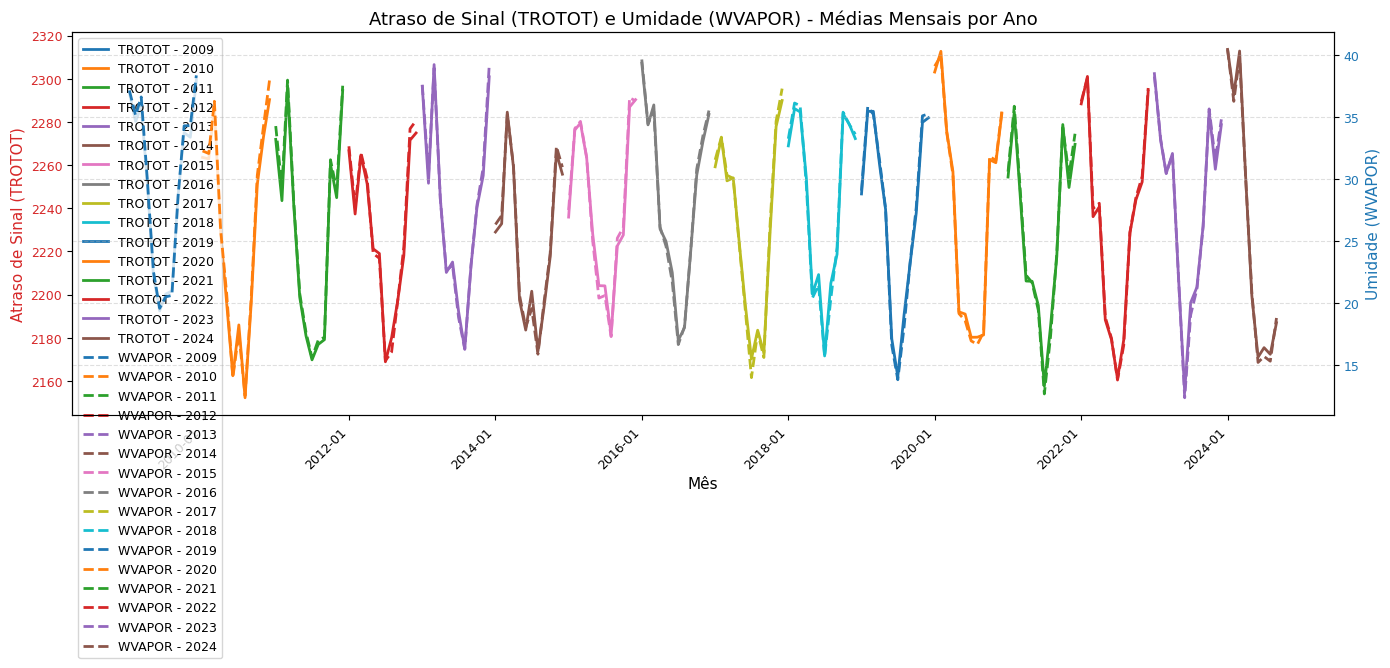

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Garante que a coluna seja datetime
df_final['data_completa'] = pd.to_datetime(df_final['data_completa'])
df_final['ds_mes'] = df_final['data_completa'].dt.to_period('M').dt.to_timestamp()
df_final['nm_ano'] = df_final['data_completa'].dt.year

# Cria as médias mensais por ano
atraso_agrupado_mes = (
    df_final.groupby(['nm_ano', 'ds_mes'])['TROTOT']
    .mean()
    .reset_index()
)
umidade_agrupado_mes = (
    df_final.groupby(['nm_ano', 'ds_mes'])['WVAPOR']
    .mean()
    .reset_index()
)

# Cria figura e dois eixos
fig, ax1 = plt.subplots(figsize=(14, 6))
ax2 = ax1.twinx()

# Paletas de cores por ano
cores = plt.cm.tab10.colors
anos = sorted(df_final['nm_ano'].unique())

# --- Eixo Y1: TROTOT ---
for i, ano in enumerate(anos):
    dados_ano = atraso_agrupado_mes[atraso_agrupado_mes['nm_ano'] == ano]
    ax1.plot(
        dados_ano['ds_mes'],
        dados_ano['TROTOT'],
        color=cores[i % len(cores)],
        label=f"TROTOT - {ano}",
        linewidth=2
    )

ax1.set_ylabel('Atraso de Sinal (TROTOT)', color='tab:red', fontsize=11)
ax1.tick_params(axis='y', labelcolor='tab:red', labelsize=9)

# --- Eixo Y2: WVAPOR ---
for i, ano in enumerate(anos):
    dados_ano = umidade_agrupado_mes[umidade_agrupado_mes['nm_ano'] == ano]
    ax2.plot(
        dados_ano['ds_mes'],
        dados_ano['WVAPOR'],
        color=cores[i % len(cores)],
        linestyle='--',
        label=f"WVAPOR - {ano}",
        linewidth=2
    )

ax2.set_ylabel('Umidade (WVAPOR)', color='tab:blue', fontsize=11)
ax2.tick_params(axis='y', labelcolor='tab:blue', labelsize=9)

# --- Eixo X ---
ax1.set_xlabel('Mês', fontsize=11)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=9)

# --- Legendas combinadas ---
lns = ax1.get_lines() + ax2.get_lines()
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper left', fontsize=9)

# --- Estética geral ---
plt.title('Atraso de Sinal (TROTOT) e Umidade (WVAPOR) - Médias Mensais por Ano', fontsize=13)
plt.grid(True, linestyle='--', alpha=0.4)
fig.tight_layout()
plt.show()


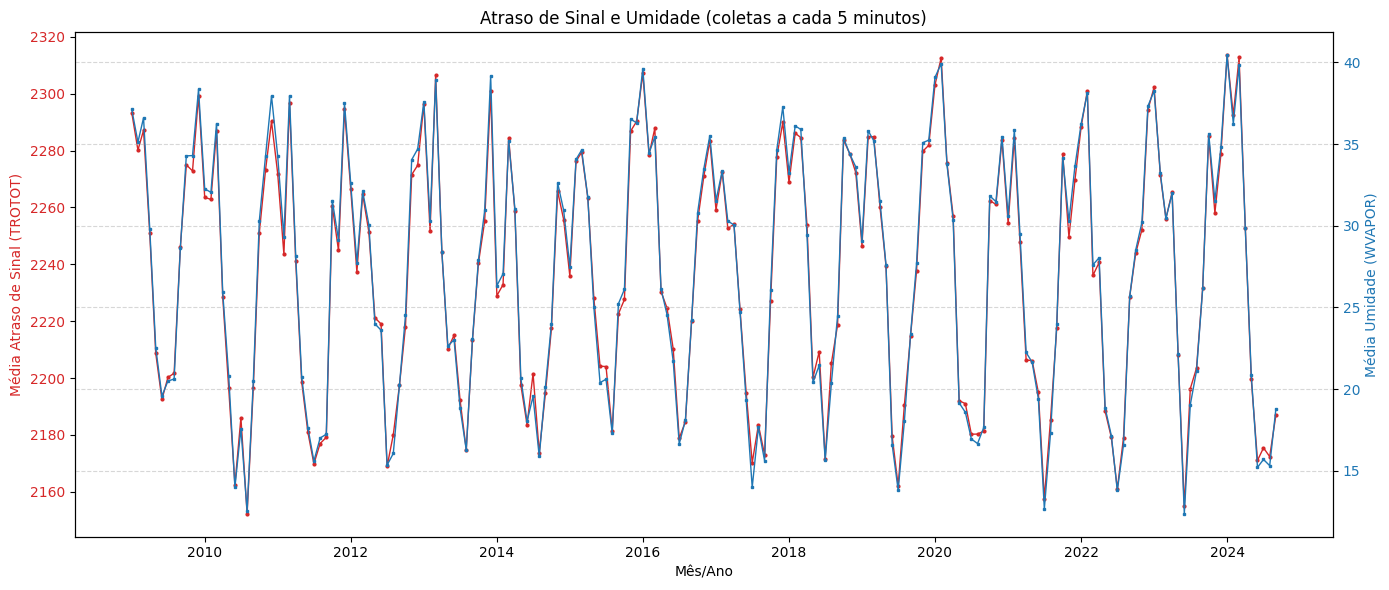

In [ ]:
cor1 = 'tab:red'
cor2 = 'tab:blue'

fig, ax1 = plt.subplots(figsize=(14, 6))
ax1.set_xlabel('Mês/Ano')
ax1.set_ylabel('Média Atraso de Sinal (TROTOT)', color=cor1)
ax1.plot(atraso_agrupado_mes['ds_mes'], atraso_agrupado_mes['TROTOT'], color=cor1, marker='o', markersize=2, linewidth=1)
ax1.tick_params(axis='y', labelcolor=cor1)

ax2 = ax1.twinx()
ax2.set_ylabel('Média Umidade (WVAPOR)', color=cor2)
ax2.plot(umidade_agrupado_mes['ds_mes'], umidade_agrupado_mes['WVAPOR'], color=cor2, marker='s', markersize=2, linewidth=1)
ax2.tick_params(axis='y', labelcolor=cor2)
# --- Aparência geral ---
plt.title('Média Atraso de Sinal e Umidade por Mês(coletas a cada 5 minutos)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Locator attempting to generate 2482 ticks ([-9.375, ..., 197.375]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2482 ticks ([-9.375, ..., 197.375]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2482 ticks ([-9.375, ..., 197.375]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2482 ticks ([-9.375, ..., 197.375]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2482 ticks ([-9.375, ..., 197.375]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2482 ticks ([-9.375, ..., 197.375]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2482 ticks ([-9.375, ..., 197.375]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2482 ticks ([-9.375, ..., 197.375]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2482 ticks ([-9.375, ..., 197.375]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2482 t

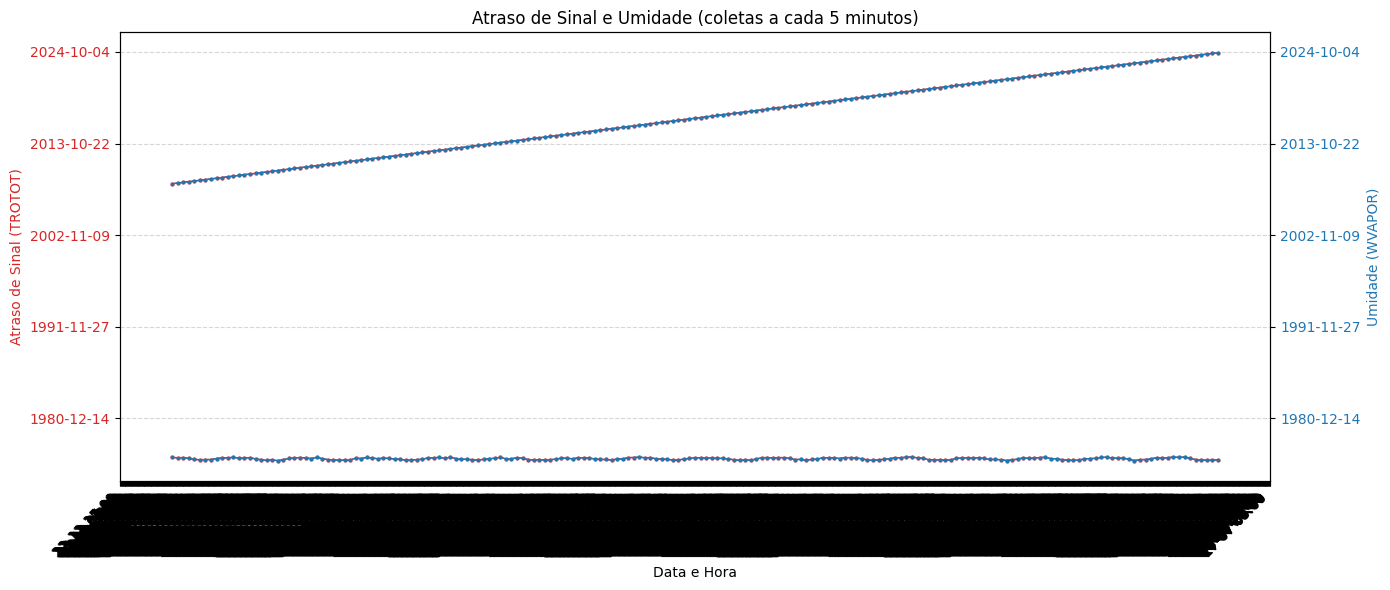

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator  # <-- Import para controlar os ticks

# Garante que o eixo X seja datetime
# df['data_completa'] = pd.to_datetime(df['data_completa'])

fig, ax1 = plt.subplots(figsize=(14, 6))

# --- Eixo Y1 (TROTOT) ---
cor1 = 'tab:red'
ax1.set_xlabel('Data e Hora')
ax1.set_ylabel('Atraso de Sinal (TROTOT)', color=cor1)
ax1.plot(atraso_agrupado_mes.index, atraso_agrupado_mes.values, color=cor1, marker='o', markersize=2, linewidth=1)
ax1.tick_params(axis='y', labelcolor=cor1)
ax1.yaxis.set_major_locator(MaxNLocator(nbins=6))  # <-- limita número de legendas Y1

# --- Eixo Y2 (WVAPOR) ---
ax2 = ax1.twinx()
cor2 = 'tab:blue'
ax2.set_ylabel('Umidade (WVAPOR)', color=cor2)
ax2.plot(umidade_agrupado_mes.index, umidade_agrupado_mes.values, color=cor2, marker='s', markersize=2, linewidth=1)
ax2.tick_params(axis='y', labelcolor=cor2)
ax2.yaxis.set_major_locator(MaxNLocator(nbins=6))  # <-- limita número de legendas Y2

# --- Formatação do eixo X ---
# Mostra apenas algumas marcas de tempo (ex: a cada 2 horas)
ax1.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

# --- Aparência geral ---
plt.title('Atraso de Sinal e Umidade (coletas a cada 5 minutos)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


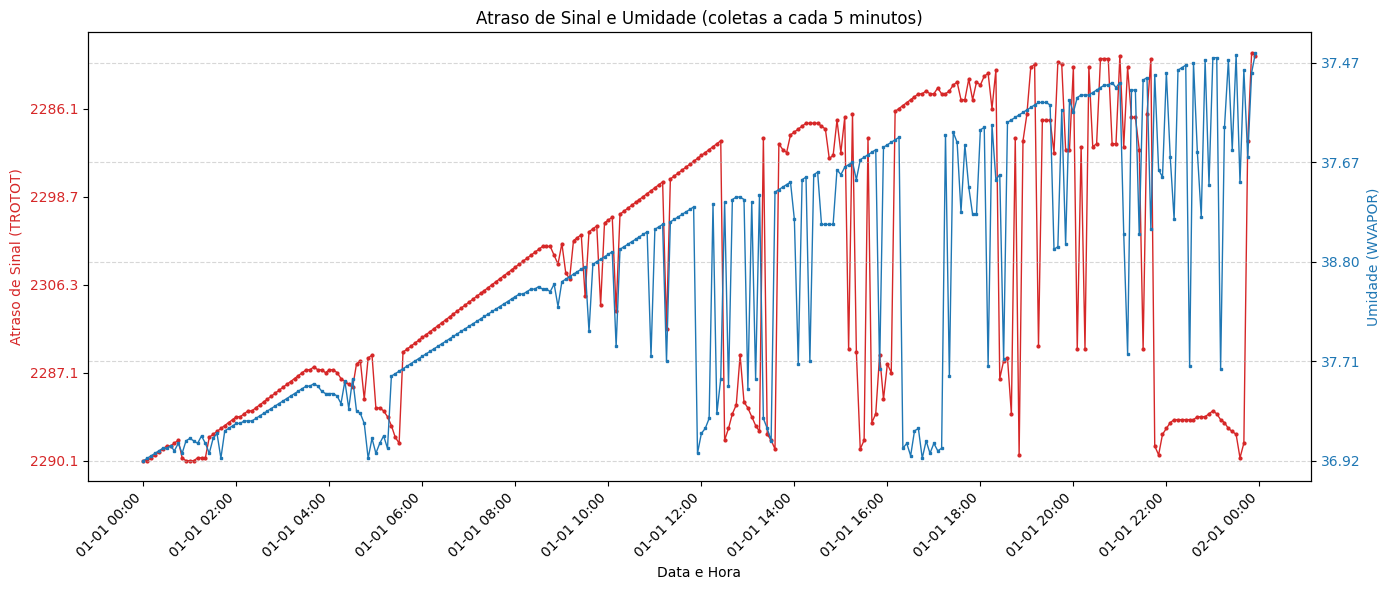

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator  # <-- Import para controlar os ticks

# Garante que o eixo X seja datetime
# df['data_completa'] = pd.to_datetime(df['data_completa'])

fig, ax1 = plt.subplots(figsize=(14, 6))

# --- Eixo Y1 (TROTOT) ---
cor1 = 'tab:red'
ax1.set_xlabel('Data e Hora')
ax1.set_ylabel('Atraso de Sinal (TROTOT)', color=cor1)
ax1.plot(df['data_completa'], df["TROTOT"], color=cor1, marker='o', markersize=2, linewidth=1)
ax1.tick_params(axis='y', labelcolor=cor1)
ax1.yaxis.set_major_locator(MaxNLocator(nbins=6))  # <-- limita número de legendas Y1

# --- Eixo Y2 (WVAPOR) ---
ax2 = ax1.twinx()
cor2 = 'tab:blue'
ax2.set_ylabel('Umidade (WVAPOR)', color=cor2)
ax2.plot(df['data_completa'], df["WVAPOR"], color=cor2, marker='s', markersize=2, linewidth=1)
ax2.tick_params(axis='y', labelcolor=cor2)
ax2.yaxis.set_major_locator(MaxNLocator(nbins=6))  # <-- limita número de legendas Y2

# --- Formatação do eixo X ---
# Mostra apenas algumas marcas de tempo (ex: a cada 2 horas)
ax1.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

# --- Aparência geral ---
plt.title('Atraso de Sinal e Umidade (coletas a cada 5 minutos)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
